# 逻辑斯谛回归

LR是经典的分类方法


回归模型：$f(x) = \frac{1}{1+e^{-wx}}$

其中wx线性函数：$wx =w_0*x_0 + w_1*x_1 + w_2*x_2 +...+w_n*x_n,(x_0=1)$


In [1]:
from math import exp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

In [2]:
# label parse
def parseRecord(df_record):
    df_group = df_record.groupby(by="label")
    label_list = list(df_group.groups.keys())
    for idx,names in enumerate(label_list):
        df_record = df_record.replace(names,idx)
        print(f"{names}-->{idx}")
    return df_record

In [3]:
# data
def create_data(file_path,names):
    df = pd.read_csv(file_path,names=names)
    datas = parseRecord(df)
    return datas.iloc[:100,:2], datas.iloc[:100,-1]

In [4]:
file_path = "../datas/iris.data"
names = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']

X, y = create_data(file_path,names)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Iris-setosa-->0
Iris-versicolor-->1
Iris-virginica-->2


In [5]:

class LogisticReressionClassifier:
    def __init__(self, max_iter=100, learning_rate=0.0001):
        self.max_iter = max_iter
        self.learning_rate = learning_rate

    def sigmoid(self, x, w):
        return 1 / (1 + exp(-np.dot(x, w)))

    def __error(self, x, y, w):
        return y - self.sigmoid(x, w)

    def data_matrix(self, X):
        data_mat = []
        for d in X.values:
            data_mat.append([*d, 1.0])
        return data_mat

    def fit(self, X, y):
        data_mat = self.data_matrix(X)  # m*n
        self.weights = np.zeros((len(data_mat[0]), 1), dtype=np.float32)

        for iter_ in range(self.max_iter):
            for i in range(len(data_mat)):
                error = self.__error(np.array(data_mat[i]), y.iloc[i], self.weights)
                self.weights += self.learning_rate * error * np.transpose([data_mat[i]])
            #print(f"iter_:{iter_}---->error:{error}\n")
        print('LogisticRegression Model(learning_rate={},max_iter={})'.format(self.learning_rate, self.max_iter))

    def score(self, X_test, y_test):
        right = 0
        X_test = self.data_matrix(X_test)
        for x, y in zip(X_test, y_test):
            result = np.dot(x, self.weights)
            if (result > 0 and y == 1) or (result < 0 and y == 0):
                right += 1
        return right / len(X_test)


In [6]:
lr_clf = LogisticReressionClassifier()
lr_clf.fit(X_train, y_train)

LogisticRegression Model(learning_rate=0.01,max_iter=200)


In [7]:
lr_clf.score(X_test, y_test)

1.0

In [12]:
lr_clf.weights

array([[ 3.4744713],
       [-5.768499 ],
       [-0.823754 ]], dtype=float32)

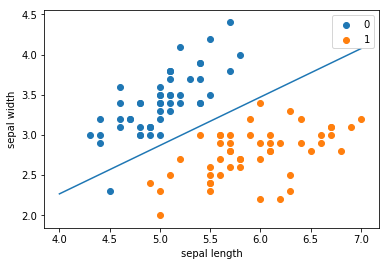

In [15]:
x_ponits = np.arange(4, 8)
y_ = -(lr_clf.weights[0]*x_ponits + lr_clf.weights[-1])/lr_clf.weights[1]
plt.plot(x_ponits, y_)

#lr_clf.show_graph()
plt.scatter(X.iloc[:50,0],X.iloc[:50,1], label='0')
plt.scatter(X.iloc[50:,0],X.iloc[50:,1], label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

## sklearn

### sklearn.linear_model.LogisticRegression

solver参数决定了我们对逻辑回归损失函数的优化方法，有四种算法可以选择，分别是：
- a) liblinear：使用了开源的liblinear库实现，内部使用了坐标轴下降法来迭代优化损失函数。
- b) lbfgs：拟牛顿法的一种，利用损失函数二阶导数矩阵即海森矩阵来迭代优化损失函数。
- c) newton-cg：也是牛顿法家族的一种，利用损失函数二阶导数矩阵即海森矩阵来迭代优化损失函数。
- d) sag：即随机平均梯度下降，是梯度下降法的变种，和普通梯度下降法的区别是每次迭代仅仅用一部分的样本来计算梯度，适合于样本数据多的时候。

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
clf = LogisticRegression(max_iter=200)

In [19]:
clf.fit(X_train, y_train)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=200, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [20]:
clf.score(X_test, y_test)

1.0

In [21]:
print(clf.coef_, clf.intercept_)

[[ 1.95164976 -3.26324605]] [-0.44059418]


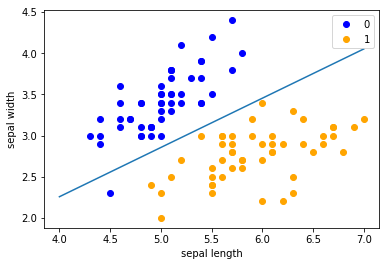

In [22]:
x_ponits = np.arange(4, 8)
y_ = -(clf.coef_[0][0]*x_ponits + clf.intercept_)/clf.coef_[0][1]
plt.plot(x_ponits, y_)

plt.plot(X.iloc[:50, 0], X.iloc[:50, 1], 'bo', color='blue', label='0')
plt.plot(X.iloc[50:, 0], X.iloc[50:, 1], 'bo', color='orange', label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()